In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Reshape, Dropout, Dense, Flatten, BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model, load_model
from keras.optimizers import Adam
import numpy as np
from PIL import Image
import os

Using TensorFlow backend.


In [0]:
def build_generator(noise_size, channels):
    model = Sequential()
    model.add(Dense(4 * 4 * 256, activation='relu', input_dim=noise_size))
    model.add(Reshape((4, 4, 256)))
    model.add(UpSampling2D())
    model.add(Conv2D(256, kernel_size=3, padding='same'))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation('relu'))
    model.add(UpSampling2D())
    model.add(Conv2D(256, kernel_size=3, padding='same'))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation('relu'))
    for i in range(3):
        model.add(UpSampling2D())
        model.add(Conv2D(256, kernel_size=3, padding='same'))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation('relu'))
    print(model.summary())
    model.add(Conv2D(channels, kernel_size=3, padding='same'))
    model.add(Activation('tanh'))
    input = Input(shape=(noise_size,))
    generated_image = model(input)    
    return Model(input, generated_image)

In [3]:
generator = build_generator(100, 3)













Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4096)              413696    
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 256)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 256)         590080    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
activation_1 (Activation)    (None, 8, 8, 256)         0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 16, 16

In [0]:
import random
a=[]
for i in range(100):
    a.append(random.uniform(0, 100))

In [0]:
a=np.array(a)
a.shape
a=np.expand_dims(a,axis=0)
a=tf.convert_to_tensor(a, dtype=tf.float32)

In [0]:
b=generator(a)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


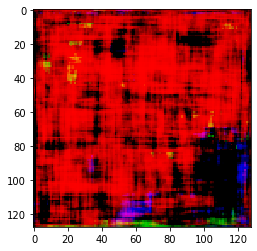

In [14]:
import matplotlib.pyplot as plt
with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)
  plt.imshow(b.eval().reshape(128,128,3))